# **Lab11: CNN for CIFAR-10 classification**

In [0]:
# Import statements
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

## **Custom Data Loading**

In [0]:
# Load Train and Test data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
# Maintaining Tag to Id and Id to Tag Dict
tag_to_id = {
    "airplane": 0,
    "automobile": 1,
    "bird": 2,
    "cat": 3,
    "deer": 4,
    "dog": 5,
    "frog": 6,
    "horse": 7,
    "ship": 8,
    "truck": 9
}

id_to_tag = {v:k for k,v in tag_to_id.items()}
id_to_tag

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

## **Data Visualization**

In [0]:
def visualize(images, labels):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index + 1, xticks=[], yticks=[])
    plt.title(id_to_tag[int(labels[index])])
    plt.imshow(images[index], cmap="gray")

  plt.show()

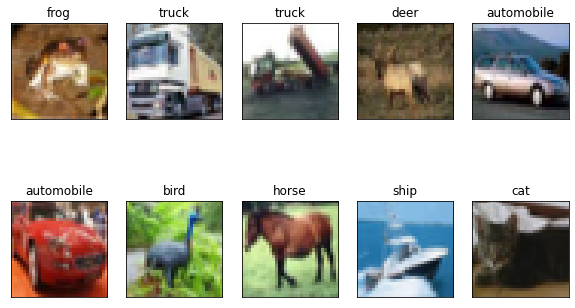

In [0]:
# Visualize Training Data
visualize(X_train, Y_train)

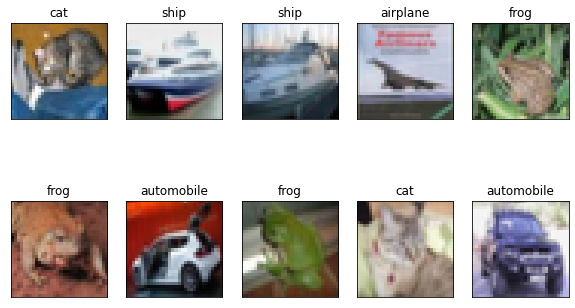

In [0]:
# Visualize Testing Data
visualize(X_test, Y_test)

In [0]:
# Reshaping Images and Labels array
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

Using TensorFlow backend.


((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

## **Define VGG-19 Model**

In [0]:
# Define Model Layers
input_im = keras.layers.Input(shape=(32, 32, 3,), name="input_image")

conv1 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv_1")(input_im)
conv2 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv_2")(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_1")(conv2)

conv3 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name="conv_3")(pool1)
conv4 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name="conv_4")(conv3)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_2")(conv4)

conv5 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_5")(pool2)
conv6 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_6")(conv5)
conv7 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_7")(conv6)
conv8 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_8")(conv7)
pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_3")(conv8)

conv9 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_9")(pool3)
conv10 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_10")(conv9)
conv11 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_11")(conv10)
conv12 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_12")(conv11)
pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_4")(conv12)

conv13 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_13")(pool4)
conv14 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_14")(conv13)
conv15 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_15")(conv14)
conv16 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_16")(conv15)
pool5 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_5")(conv16)

flat = keras.layers.Flatten(name="flat")(pool5)
dense_1 = keras.layers.Dense(4096, activation="relu", name="dense_1")(flat)
dense_2 = keras.layers.Dense(4096, activation="relu", name="dense_2")(dense_1)
output = keras.layers.Dense(10, activation="softmax", name="output")(dense_2)

# Define Model Inputs and Output
model = keras.models.Model(input_im,output)
# Compile Model
model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=["accuracy"])
# Model Summary
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 16, 16, 128)       73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 16, 16, 128)       147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 8, 8, 128)         0   

## **Data Augmentation**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

## **Training**

In [0]:
batch_size = 64 
epochs = 100
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size), 
                    steps_per_epoch= len(X_train) / batch_size, epochs=epochs)

Epoch 1/100
782/781 [==============================] - 30s 39ms/step - loss: 2.3026 - accuracy: 0.1002
Epoch 2/100
782/781 [==============================] - 30s 39ms/step - loss: 2.3026 - accuracy: 0.0989
Epoch 3/100
782/781 [==============================] - 30s 39ms/step - loss: 2.3026 - accuracy: 0.0996
Epoch 4/100
782/781 [==============================] - 30s 39ms/step - loss: 2.3025 - accuracy: 0.1018
Epoch 5/100
782/781 [==============================] - 30s 38ms/step - loss: 2.3023 - accuracy: 0.1067
Epoch 6/100
782/781 [==============================] - 30s 38ms/step - loss: 2.3020 - accuracy: 0.1198
Epoch 7/100
782/781 [==============================] - 30s 38ms/step - loss: 2.3012 - accuracy: 0.1228
Epoch 8/100
782/781 [==============================] - 30s 38ms/step - loss: 2.2981 - accuracy: 0.1583
Epoch 9/100
782/781 [==============================] - 30s 38ms/step - loss: 2.2726 - accuracy: 0.1749
Epoch 10/100
782/781 [==============================] - 30s 38ms/step - l

## **Training and Testing Accuracy**

In [0]:
_, train_acc = model.evaluate(X_train, Y_train)
_, test_acc = model.evaluate(X_test, Y_test)

print('Training Accuray: ', train_acc * 100)
print('Testing Accuray: ', test_acc * 100)

313/313 [==============================] - 3s 9ms/step - loss: 0.6698 - accuracy: 0.8199
Training Accuray:  88.93200159072876
Testing Accuray:  81.98999762535095


## **Evaluation Metrics Report**

In [0]:
# Evaluate
pred_cat = model.predict(X_test)
predicted = [np.argmax(i) for i in pred_cat]
predicted_tag = [id_to_tag[i] for i in predicted]
predicted_tag = np.array(predicted_tag)
actual = [np.argmax(i) for i in Y_test]
actual_tag = [id_to_tag[i] for i in actual]
actual_tag = np.array(actual_tag)

# Metrics Report
report = metrics.classification_report(y_pred=predicted_tag, y_true=actual_tag)
print(report)

              precision    recall  f1-score   support

    airplane       0.75      0.91      0.82      1000
  automobile       0.83      0.97      0.89      1000
        bird       0.91      0.61      0.73      1000
         cat       0.71      0.70      0.70      1000
        deer       0.83      0.80      0.81      1000
         dog       0.90      0.65      0.76      1000
        frog       0.76      0.94      0.84      1000
       horse       0.87      0.86      0.87      1000
        ship       0.85      0.94      0.90      1000
       truck       0.87      0.83      0.85      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



## **Accuracy Curve**

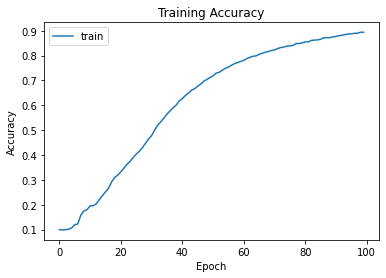

In [0]:
# Plotting Training Accuracy
plt.plot(history.history['accuracy'])  
plt.title('Training Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train']) 
plt.show()

## **Loss Curve**

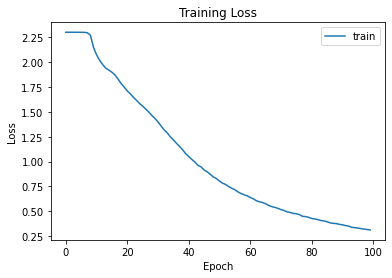

In [0]:
# Plotting Training Loss
plt.plot(history.history['loss'])  
plt.title('Training Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train']) 
plt.show()

## **Confusion Matrix**

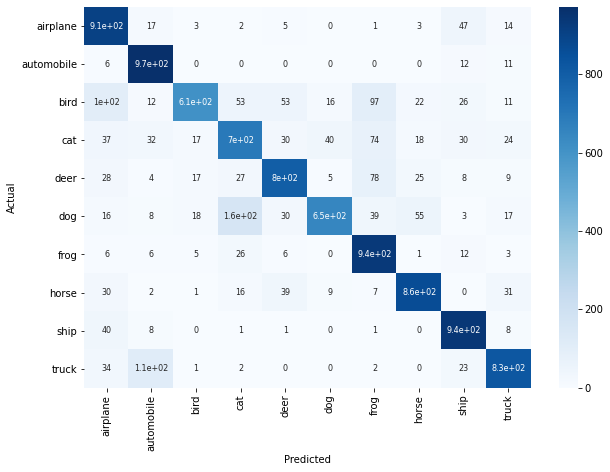

In [0]:
# Confusion Matrix
cm = metrics.confusion_matrix(actual_tag, predicted_tag)

df_cm = pd.DataFrame(cm, columns=np.unique(actual_tag), index = np.unique(predicted_tag))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})

## **Testing**

In [0]:
def inference(images):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index+1, xticks=[], yticks=[])
    image = images[index].reshape(1, 32, 32, 3)
    label = model.predict(image)
    image = image.reshape(32,32,3)
    plt.title(id_to_tag[np.argmax(label)])
    plt.imshow(image, cmap="gray")
  plt.show()

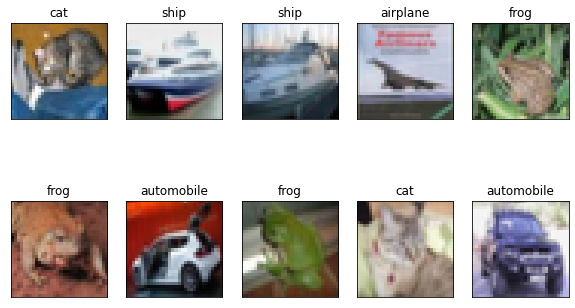

In [0]:
inference(X_test)